In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [108]:
df = pd.read_table('TensionLab.txt', delim_whitespace=True)
df = df.drop(columns="Displ(mm)")
df = df[df['Strain(%)'] != 3.5]
print(df)

     Force(N)  Strain(%)
0           3   0.000267
1           3   0.000133
2           3   0.000267
3           3   0.000267
4           3   0.000267
..        ...        ...
233     23468   3.357867
234     23475   3.386667
235     23483   3.416267
236     23488   3.446000
237     23500   3.477067

[238 rows x 2 columns]


<Axes: xlabel='Strain(%)', ylabel='Force(N)'>

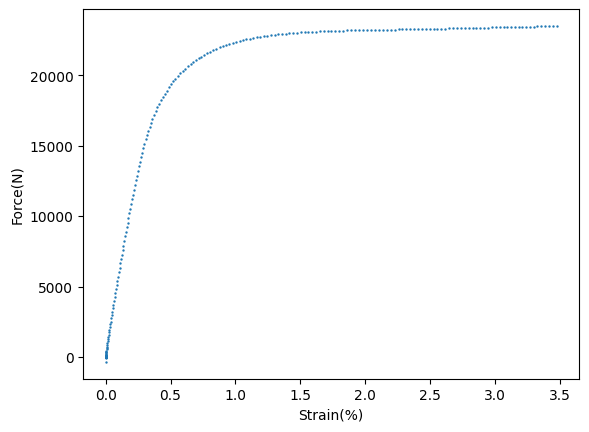

In [109]:
#making scatter plot to show raw data
df.plot.scatter(1,0, s=0.5)

In [110]:
#getting Stress- divide force by cross sectional area
#diameter = 6.38mm
#cross sectional area = 31.97 mm^2
df["Force(N)"] = df["Force(N)"].div(31.97)
print(df)

       Force(N)  Strain(%)
0      0.093838   0.000267
1      0.093838   0.000133
2      0.093838   0.000267
3      0.093838   0.000267
4      0.093838   0.000267
..          ...        ...
233  734.063184   3.357867
234  734.282140   3.386667
235  734.532374   3.416267
236  734.688771   3.446000
237  735.064123   3.477067

[238 rows x 2 columns]


In [111]:
df["Strain(%)"] = df["Strain(%)"].div(100) #making strain from percent into fraction
print(df)

       Force(N)  Strain(%)
0      0.093838   0.000003
1      0.093838   0.000001
2      0.093838   0.000003
3      0.093838   0.000003
4      0.093838   0.000003
..          ...        ...
233  734.063184   0.033579
234  734.282140   0.033867
235  734.532374   0.034163
236  734.688771   0.034460
237  735.064123   0.034771

[238 rows x 2 columns]


In [112]:
df = df.rename(columns = {"Force(N)":"Stress(MPa)","Strain(%)":"Strain(fraction)"})
print(df)

     Stress(MPa)  Strain(fraction)
0       0.093838          0.000003
1       0.093838          0.000001
2       0.093838          0.000003
3       0.093838          0.000003
4       0.093838          0.000003
..           ...               ...
233   734.063184          0.033579
234   734.282140          0.033867
235   734.532374          0.034163
236   734.688771          0.034460
237   735.064123          0.034771

[238 rows x 2 columns]


<Axes: xlabel='Strain(fraction)'>

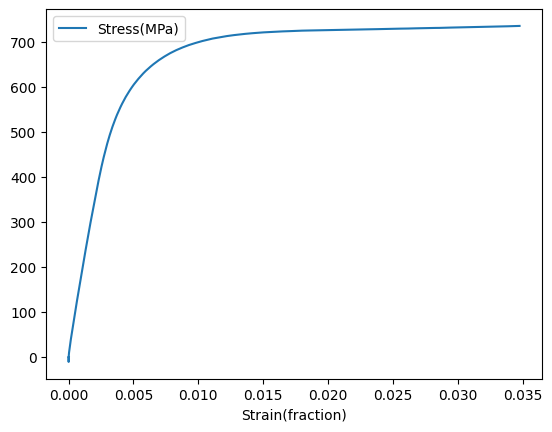

In [113]:
df.plot(x='Strain(fraction)', y='Stress(MPa)')

<Axes: xlabel='Strain(fraction)'>

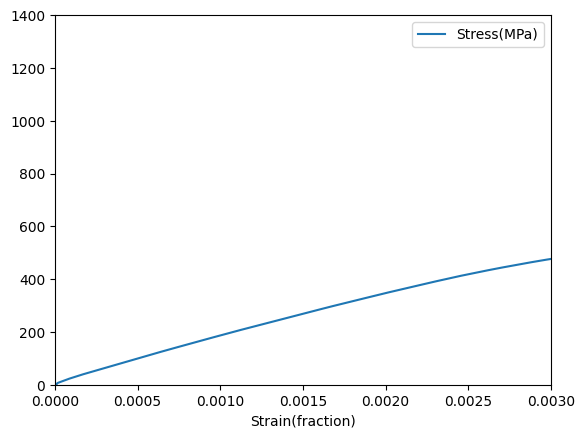

In [114]:
df.plot(x='Strain(fraction)', y='Stress(MPa)', xlim=(0,0.003), ylim=(0,1400))

In [115]:
#calculating young's modulus
polyfitdf = df[df['Strain(fraction)'] <= 0.003]
x = polyfitdf['Strain(fraction)']
y = polyfitdf['Stress(MPa)']
youngs = np.polyfit(x, y, 1)
print(youngs)

[1.68787156e+05 4.58092553e+00]


In [116]:
#so, y = (1.69*10^5)x + 4.62 
#1.69*10^5 is megapascals (N/mm2)
#means: 169.000 GPa
#actual is 193 GPa

In [117]:
!pip3 install intersect

36733.65s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [118]:
from intersect import intersection

[0.00571974] [628.63627646]
735.0641226149515


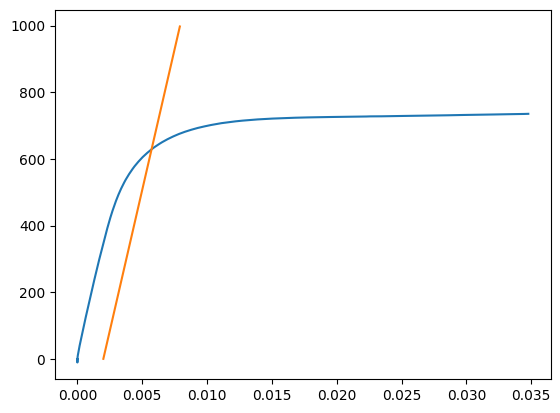

In [122]:
x1 = df['Strain(fraction)'].values
y1 = df['Stress(MPa)'].values
plt.plot(x1, y1)
x = np.arange(0.002, 0.008, 0.0001)
m = 169000
x2 = 0.002
y2 = 0.0
y = m*(x-x2) + y2
plt.plot(x,y)
a,b = intersection(x1, y1, x, y)
#plt.axline((0.002,0), slope=169000)
# # plt.plot(x, y, "*k")
print(a,b) #intersection of lines, y value is yield stress
print(y1.max()) #this is ultimate stress

In [120]:
#yield stress: 629 MPa, 415MPa